In [4]:
import pandas as pd

In [5]:
dataset = pd.read_csv("Placement_preprocessed.csv")

In [6]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# PDF - Probaility density function

In [7]:
#write  a function for PDF since we don't have in built function
def get_pdf_probability(dataset, start_range, end_range):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    #plot the dataset in a histogram graph, kde is kernel and it is Green. Then the color for the curve is blue
    sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')
    #plot verical line on the start range and end range in Red color
    #axvline means axis vertical line
    pyplot.axvline(start_range, color='Red')
    pyplot.axvline(end_range, color ='Red')
    #create a sample
    sample = dataset
    #find mean and standard deviation for sample
    mean = sample.mean()
    std_deviation = sample.std()
    #print the mean and standard deviation only with 3 digits decimall
    # % is a place holder
    #The tuple  contains the values to be inserted into the placeholders in the string. The first value () replaces the first , and the second value () replaces the second 
    #print("Mean=%.3f, Standard deviation=%.3f" % (mean, std_deviation))
    #simple approach is below with f string
    print(f"Mean={mean:.3f}, Standard deviation={std_deviation:.3f}")
    #define the distribution
    dist = norm(mean, std_deviation)
    #create a list of range (one line code)
    values = [value for value in range(start_range, end_range)]
    
    #sample probablity for a range of outcome
    #find probablity and store them in a list again
    probabilities  = [dist.pdf(value) for value in values]
    #Add all the probablities in the list for each value in range
    prob = sum(probabilities)
    
    print("The area between range({},{}):{}".format(start_range, end_range, prob))
    
    #simple approach to print with with f string is
    #print(f"The area between range({start_range},{end_range}):{prob}")

    return prob
    

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


Mean=67.303, Standard deviation=10.827
The area between range(60,80):0.6346413295441957


0.6346413295441957

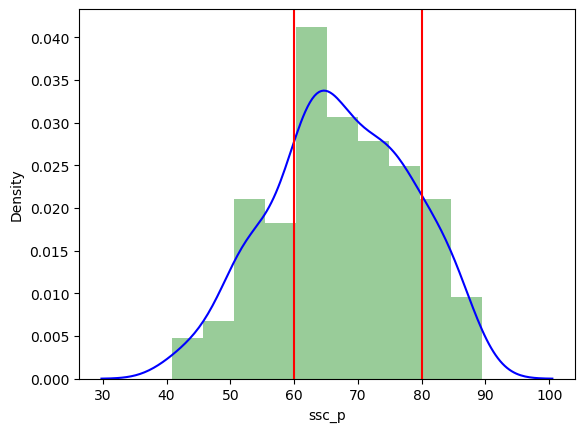

In [8]:
get_pdf_probability(dataset['ssc_p'], 60, 80)

# CDF - Commulative Density Function

In [9]:
#!pip install statsmodels
# We have inbuilt function for Cumulative Density Distribution
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset["ssc_p"])


In [12]:
#check by entering ssc_p data in the ecdf fucntion
ecdf(80)

0.8651162790697674

# SND - Standard Normal Distribution

In [16]:
#write  a function for SND since we don't have in built function
def stdNBgraph(dataset):
    """Converts normal disribution into standrd normal distribution"""
    import seaborn as sns
    mean = dataset.mean()
    std_deviation = dataset.std()
    
    #create a list that contains values of the input colum from dataset
    
    Values = [i for i in dataset]
    
    # find z_score value for each value in the above list value and store in a list "z_score"
    # formula for z_core = (x-μ)/σ 
    
    z_score = [(x-mean)/std_deviation for x in Values]
    
    # plot the z_score using seaborn library
    sns.distplot(z_score, kde=True, color="Green", kde_kws = {"color" : "blue"})
    
    #find average for z_score in the list "z_socre"
    sum(z_score) / len(z_score)

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



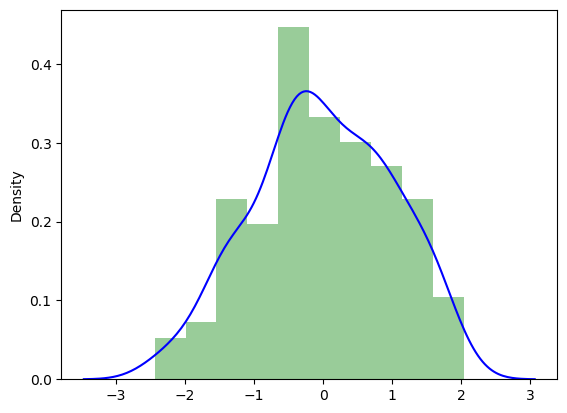

In [17]:
stdNBgraph(dataset["ssc_p"])